In [ ]:
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

In [7]:
import torch
import torchvision
from torch import nn

n_input, n_hidden, n_out = 2, 15, 1
net = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_out),
                      )
net(torch.tensor([3.0,4]))  #<--This runs the network with a noise of 3 at time-step 4

tensor([0.7284], grad_fn=<ViewBackward0>)

In [14]:
?net

Signature:      net(*args, **kwargs)
Type:           Sequential
String form:   
Sequential(
           (0): Linear(in_features=2, out_features=15, bias=True)
           (1): ReLU()
           (2): Linear( <...> _features=15, bias=True)
           (3): ReLU()
           (4): Linear(in_features=15, out_features=1, bias=True)
           )
Length:         5
File:           ~/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/container.py
Docstring:     
A sequential container.

Modules will be added to it in the order they are passed in the
constructor. Alternatively, an ``OrderedDict`` of modules can be
passed in. The ``forward()`` method of ``Sequential`` accepts any
input and forwards it to the first module it contains. It then
"chains" outputs to inputs sequentially for each subsequent module,
finally returning the output of the last module.

The value a ``Sequential`` provides over manually calling a sequence
of modules is that it allows treating the whole container as a
singl

In [9]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/emueller/opt/anaconda3/lib/python3.9/site-packages/torch/_tensor_str.py:137: UserWarning: MPS: nonzero op is supported natively starting from macOS 13.0. Falling back on CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1711403209812/work/aten/src/ATen/native/mps/operations/Indexing.mm:283.)
  nonzero_finite_vals = torch.masked_select(


tensor([1.], device='mps:0')


In [5]:
torch.backends.mps.is_available()

True

In [6]:
import sys
print(sys.version)

3.9.19 (main, May  6 2024, 14:46:57) 
[Clang 14.0.6 ]


In [15]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [16]:
!pip install datasets

Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized



In [17]:
import torchvision 

In [18]:
from torchvision.transforms  import Compose
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
import pylab as plt
import numpy as np
import torch
import copy
from diffusers import DDPMScheduler, UNet2DModel
import pickle

In [19]:
dataset = torchvision.datasets.MNIST(root="mnist/", train=True, download=True, transform=Compose([
              torchvision.transforms.ToTensor(),
              torchvision.transforms.Lambda(lambda t: (t * 2) - 1)]))
train_dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|                                                                                  | 0/9912422 [00:00<?, ?it/s]Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

100%|██████████████████████████████████████████████████████████████| 9912422/9912422 [00:00<00:00, 41214711.59it/s]


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 1648261.66it/s]

Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 14437101.59it/s]


Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 285855.12it/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



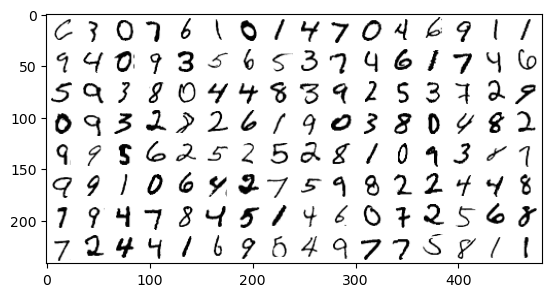

In [20]:
def PlotImages(x):
  plt.imshow(torchvision.utils.make_grid((x+1)/2, nrow=16)[0], cmap='Greys')
  plt.show()

x=next(iter(train_dataloader))[0]
PlotImages(x)

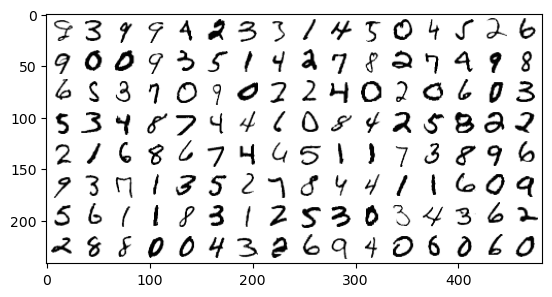

In [22]:
x=next(iter(train_dataloader))[0]
PlotImages(x)

In [24]:
dt1=next(iter(train_dataloader));

In [29]:
dt1[1]

tensor([9, 2, 2, 5, 3, 1, 9, 6, 7, 7, 3, 7, 7, 4, 7, 2, 1, 9, 2, 3, 2, 8, 0, 5,
        9, 2, 6, 6, 6, 8, 3, 6, 4, 8, 6, 2, 9, 1, 4, 3, 2, 5, 5, 4, 9, 4, 5, 0,
        3, 5, 6, 3, 0, 9, 2, 9, 4, 2, 4, 8, 0, 8, 0, 0, 9, 6, 0, 9, 9, 6, 7, 1,
        4, 0, 9, 3, 8, 3, 2, 7, 6, 0, 9, 5, 1, 7, 2, 4, 8, 8, 1, 1, 9, 7, 0, 0,
        6, 3, 5, 0, 9, 1, 4, 8, 5, 5, 5, 2, 9, 1, 6, 7, 6, 4, 2, 8, 5, 7, 3, 6,
        1, 8, 2, 0, 6, 2, 3, 2])

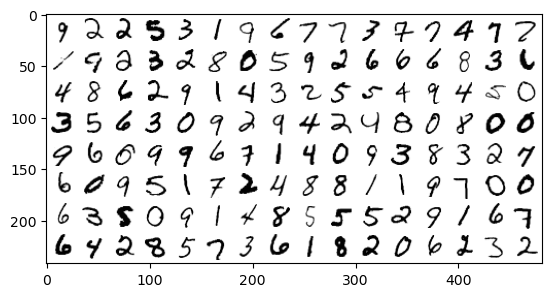

In [30]:
PlotImages(dt1[0])

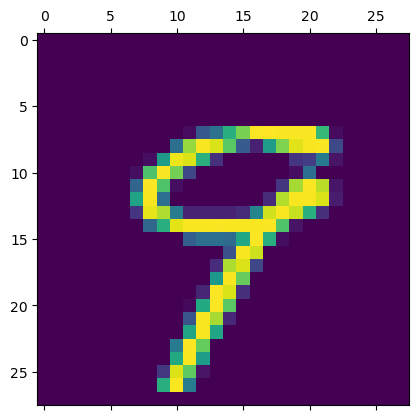

In [31]:
plt.matshow(x[3,0,:,:])

In [32]:
beta_max = 0.05
timesteps = 200
T=timesteps
beta = torch.tensor(np.linspace(0.0001, beta_max, T,dtype=np.float32))
alpha=1-beta
alpha_bar=torch.tensor(np.cumprod(alpha))

/var/folders/85/67d2nfqd5r1_zr1c8z8_bfx80000gn/T/ipykernel_38900/1330243658.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  alpha_bar=torch.tensor(np.cumprod(alpha))


In [36]:
import numpy as np
import pylab as plt

In [49]:
def ForwardDiffusion(x_0,T, delta):
    t=0
    locations=zeros(T,dtype=np.float32)
    x=x_0
    locations[t]=x
    t+=1
    while t<T:
        x+=-(delta/2)*x+sqrt(delta)*np.random.normal()
        locations[t]=x
        t+=1
    return locations

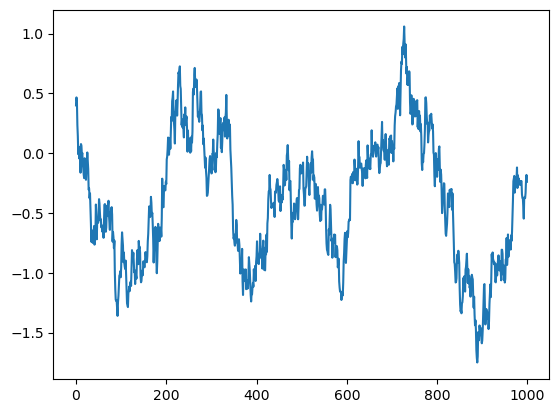

In [52]:
path1=ForwardDiffusion(0.4,1000,0.01)
plot(path1)

In [53]:
def ForwardDiffusion(x_0,T, beta_t):
    t=0
    locations=zeros(T,dtype=np.float32)
    x=x_0
    locations[t]=x
    t+=1
    while t<T:
        x=x*sqrt(1-beta_t[t])+sqrt(beta_t[t])*np.random.normal()
        locations[t]=x
        t+=1
    return locations

[[<matplotlib.lines.Line2D at 0x7ff5cced6850>],

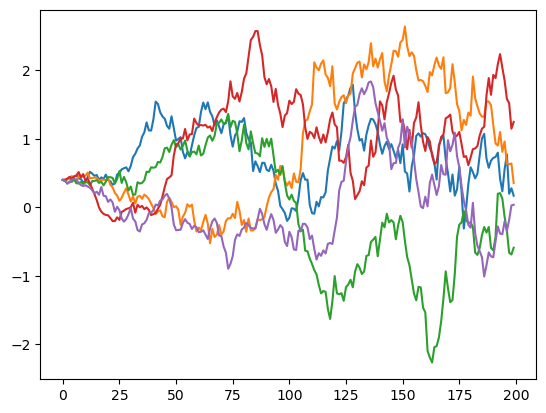

In [63]:
beta_t=np.linspace(0.0001,0.05,200,dtype=np.float32)
dr=[ForwardDiffusion(0.4,200,beta_t) for i in range(0,5)]
[plot(dr[j]) for j in range(0,5)]

In [56]:
[i for i in range(1,10)]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [67]:
def ForwardDiffusionFast(x_0,T,alpha_bar):
    return sqrt(alpha_bar[T])+sqrt(1-alpha_bar[T])*np.random.normal()

In [71]:
beta_t=np.linspace(0.0001,0.05,200,dtype=np.float32)
alpha_t=1-beta_t
alpha_bar=np.cumproduct(alpha_t)
xf=ForwardDiffusionFast(0.4,199,alpha_bar)

In [72]:
xf

0.5931364283947923